In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d saailna/war-events-classification

 82% 66.0M/80.4M [00:00<00:00, 88.6MB/s]
100% 80.4M/80.4M [00:01<00:00, 79.6MB/s]


In [4]:
!unzip /content/war-events-classification.zip

Archive:  /content/war-events-classification.zip
  inflating: war_events/Combat/1.jpg  
  inflating: war_events/Combat/10.jpeg  
  inflating: war_events/Combat/100.jpg  
  inflating: war_events/Combat/11.jpeg  
  inflating: war_events/Combat/12.jpeg  
  inflating: war_events/Combat/13.jpeg  
  inflating: war_events/Combat/14.jpeg  
  inflating: war_events/Combat/15.jpeg  
  inflating: war_events/Combat/16.jpeg  
  inflating: war_events/Combat/17.jpeg  
  inflating: war_events/Combat/18.jpeg  
  inflating: war_events/Combat/19.jpeg  
  inflating: war_events/Combat/2.jpeg  
  inflating: war_events/Combat/20.jpeg  
  inflating: war_events/Combat/21.jpeg  
  inflating: war_events/Combat/22.jpeg  
  inflating: war_events/Combat/23.jpeg  
  inflating: war_events/Combat/24.jpeg  
  inflating: war_events/Combat/25.jpeg  
  inflating: war_events/Combat/26.jpeg  
  inflating: war_events/Combat/27.jpeg  
  inflating: war_events/Combat/28.jpeg  
  inflating: war_events/Combat/29.jpeg  
  inflating

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image
# ResNet - Residual Networks



In [6]:
combat="/content/war_events/Combat"
destroyed_building="/content/war_events/DestroyedBuildings"
fire="/content/war_events/Fire"
humanterian="/content/war_events/Humanitarian Aid and rehabilitation"
vehicles="/content/war_events/Military vehicles and weapons"

In [9]:
combat1=[os.path.join(combat,f) for f in os.listdir(combat)]
destroyed_building1=[os.path.join(destroyed_building,f) for f in os.listdir(destroyed_building)]
fire1=[os.path.join(fire,f) for f in os.listdir(fire)]
humanterian1=[os.path.join(humanterian,f) for f in os.listdir(humanterian)]
vehicles1=[os.path.join(vehicles,f) for f in os.listdir(vehicles)]

In [10]:
image_files=combat1+destroyed_building1+fire1+humanterian1+vehicles1

In [11]:
label= [0] * len(combat1) +[1] * len(destroyed_building1) + [2] * len(fire1) + [3] * len(humanterian1) + [4] * len(vehicles1)

# Data description

In [12]:
df = pd.DataFrame({'image': image_files, 'labels': label})
df

,image,labels
0,/content/war_events/Combat/79.jpeg,0
1,/content/war_events/Combat/52.jpeg,0
2,/content/war_events/Combat/60.jpeg,0
3,/content/war_events/Combat/55.jpeg,0
4,/content/war_events/Combat/2.jpeg,0
...,...,...
495,/content/war_events/Military vehicles and weap...,4
496,/content/war_events/Military vehicles and weap...,4
497,/content/war_events/Military vehicles and weap...,4
498,/content/war_events/Military vehicles and weap...,4


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['image'],df['labels'],test_size=0.2)

# Data Augumentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test=ImageDataGenerator(rescale=1./255)

In [16]:
df["labels"]=df["labels"].astype(str)

In [17]:
train1 = train.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col="labels",
    target_size=(64, 64),
    class_mode="categorical",
    batch_size=100
)

Found 499 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [18]:
test1=test.flow_from_dataframe(
    dataframe=df,
    x_col='image',
    y_col="labels",
    target_size=(64, 64),
    class_mode="categorical",
    batch_size=100
)

Found 499 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


# Model Building

In [50]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50,MobileNetV2,EfficientNetB0, DenseNet121,InceptionV3, Xception
from tensorflow.keras.optimizers import Adam

# MobileNetV2

In [ ]:
mobilenet_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Freeze the pretrained layers
mobilenet_model.trainable = False

In [ ]:
model_new1 = Sequential([
    mobilenet_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

In [ ]:
model_new1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history_new1 = model_new1.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=20,
    validation_data=test1,
    validation_steps=len(test1)
)

Epoch 1/20
5/5 [==============================] - 24s 4s/step - loss: 1.9639 - accuracy: 0.2786 - val_loss: 1.1439 - val_accuracy: 0.5411
Epoch 2/20
5/5 [==============================] - 16s 4s/step - loss: 1.3110 - accuracy: 0.4810 - val_loss: 0.8619 - val_accuracy: 0.6713
Epoch 3/20
5/5 [==============================] - 12s 3s/step - loss: 0.9879 - accuracy: 0.6373 - val_loss: 0.7435 - val_accuracy: 0.7275
Epoch 4/20
5/5 [==============================] - 17s 4s/step - loss: 0.8716 - accuracy: 0.6693 - val_loss: 0.6606 - val_accuracy: 0.7595
Epoch 5/20
5/5 [==============================] - 17s 4s/step - loss: 0.7848 - accuracy: 0.7435 - val_loss: 0.5959 - val_accuracy: 0.7735
Epoch 6/20
5/5 [==============================] - 13s 3s/step - loss: 0.7211 - accuracy: 0.7535 - val_loss: 0.5410 - val_accuracy: 0.8016
Epoch 7/20
5/5 [==============================] - 17s 4s/step - loss: 0.6880 - accuracy: 0.7655 - val_loss: 0.5083 - val_accuracy: 0.8176
Epoch 8/20
5/5 [==================

In [56]:
model_new1.save('model_new1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# DenseNet 121

In [ ]:
densenet_model = DenseNet121(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
densenet_model.trainable = False

In [ ]:
model6 = Sequential([
    densenet_model,
    GlobalAveragePooling2D(),         # Global average pooling layer
    Dense(128, activation='relu'),    # Hidden layer
    Dropout(0.5),                     # Dropout for regularization
    Dense(5, activation='softmax')    # Output layer for 5 classes with softmax activation
])


In [59]:
model6.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history6 = model6.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=15,
    validation_data=test1,
    validation_steps=len(test1)
)


Epoch 1/15
5/5 [==============================] - 39s 6s/step - loss: 2.8302 - accuracy: 0.2806 - val_loss: 1.0374 - val_accuracy: 0.6112
Epoch 2/15
5/5 [==============================] - 19s 4s/step - loss: 1.4705 - accuracy: 0.5010 - val_loss: 0.7753 - val_accuracy: 0.7315
Epoch 3/15
5/5 [==============================] - 21s 4s/step - loss: 1.1179 - accuracy: 0.5952 - val_loss: 0.6386 - val_accuracy: 0.7776
Epoch 4/15
5/5 [==============================] - 21s 4s/step - loss: 0.9295 - accuracy: 0.6573 - val_loss: 0.5952 - val_accuracy: 0.7876
Epoch 5/15
5/5 [==============================] - 21s 4s/step - loss: 0.8412 - accuracy: 0.6874 - val_loss: 0.5513 - val_accuracy: 0.8156
Epoch 6/15
5/5 [==============================] - 20s 4s/step - loss: 0.7295 - accuracy: 0.7415 - val_loss: 0.5299 - val_accuracy: 0.8297
Epoch 7/15
5/5 [==============================] - 21s 5s/step - loss: 0.7033 - accuracy: 0.7335 - val_loss: 0.4979 - val_accuracy: 0.8397
Epoch 8/15
5/5 [==================

# EfficientNetB0

In [ ]:
efficientnet_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
efficientnet_model.trainable = False

In [49]:
model4 = Sequential([
    efficientnet_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model4.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model4.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=10,
    validation_data=test1,
    validation_steps=len(test1)
)


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/10
5/5 [==============================] - 25s 4s/step - loss: 1.7063 - accuracy: 0.2064 - val_loss: 1.6188 - val_accuracy: 0.2004
Epoch 2/10
5/5 [==============================] - 15s 3s/step - loss: 1.6443 - accuracy: 0.1904 - val_loss: 1.6117 - val_accuracy: 0.1984
Epoch 3/10
5/5 [==============================] - 20s 5s/step - loss: 1.6277 - accuracy: 0.2024 - val_loss: 1.6105 - val_accuracy: 0.2004
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 1.6206 - accuracy: 0.1924 - val_loss: 1.6098 - val_accuracy: 0.2004
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: 1.6194 - accuracy: 0.2064 - val_loss: 1.6100 - val_accuracy: 0.2004
Epoch 6/10
5/5 [==============================] - 19s 4s/step - loss: 1.6111 - accuracy: 0.2224 - val_loss: 1.6099 - val_accuracy: 0.2204
Epoch 7/10
5/5 [==============================] - 17s 4s/step - loss: 1.6151 - accuracy: 0.2224 - val_loss:

# InceptionV3

In [ ]:
inception_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
inception_model.trainable = False

In [ ]:
model5 = Sequential([
    inception_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
    ])

In [52]:
model5.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=10,
    validation_data=test1,
    validation_steps=len(test1)
)


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/10
5/5 [==============================] - 38s 6s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 2/10
5/5 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 3/10
5/5 [==============================] - 17s 4s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 5/10
5/5 [==============================] - 14s 3s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 6/10
5/5 [==============================] - 17s 4s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 7/10
5/5 [==============================] - 23s 5s/step - loss: nan - accuracy: 0.2004 - val_loss: nan - val_accuracy: 0.2004
Epoch 8/10


# Xception

In [ ]:
xception_model = Xception(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
xception_model.trainable = False

In [61]:
model_xception = Sequential([
    xception_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
model_xception.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_xception = model_xception.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=15,
    validation_data=test1,
    validation_steps=len(test1)
)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/15
5/5 [==============================] - 30s 6s/step - loss: 1.5387 - accuracy: 0.3186 - val_loss: 1.3393 - val_accuracy: 0.5571
Epoch 2/15
5/5 [==============================] - 33s 7s/step - loss: 1.2602 - accuracy: 0.5471 - val_loss: 1.1460 - val_accuracy: 0.6353
Epoch 3/15
5/5 [==============================] - 33s 7s/step - loss: 1.1330 - accuracy: 0.6273 - val_loss: 1.0481 - val_accuracy: 0.6613
Epoch 4/15
5/5 [==============================] - 32s 7s/step - loss: 1.0881 - accuracy: 0.6212 - val_loss: 0.9793 - val_accuracy: 0.6954
Epoch 5/15
5/5 [==============================] - 24s 5s/step - loss: 0.9903 - accuracy: 0.6874 - val_loss: 0.9261 - val_accuracy: 0.7094
Epoch 6/15
5/5 [==============================] - 33s 7s/step - loss: 1.0053 - accuracy: 0.6593 - val_loss: 0.8813 - val_accuracy: 0.7134
Epoch 7/15
5/5 [==============================] - 33s 7s/step - loss: 0.9085 - accuracy: 0.7174 - val_loss:

# ResNet50

In [62]:
resnet_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
resnet_model.trainable = False

model_resnet = Sequential([
    resnet_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


history_resnet = model_resnet.fit(
    train1,
    steps_per_epoch=len(train1),
    epochs=15,
    validation_data=test1,
    validation_steps=len(test1)
)

Epoch 1/15
5/5 [==============================] - 30s 6s/step - loss: 1.7540 - accuracy: 0.2084 - val_loss: 1.6242 - val_accuracy: 0.2004
Epoch 2/15
5/5 [==============================] - 35s 8s/step - loss: 1.6759 - accuracy: 0.1824 - val_loss: 1.6245 - val_accuracy: 0.2044
Epoch 3/15
5/5 [==============================] - 33s 7s/step - loss: 1.6671 - accuracy: 0.2164 - val_loss: 1.5971 - val_accuracy: 0.2505
Epoch 4/15
5/5 [==============================] - 34s 7s/step - loss: 1.6400 - accuracy: 0.2064 - val_loss: 1.5980 - val_accuracy: 0.2525
Epoch 5/15
5/5 [==============================] - 32s 7s/step - loss: 1.6191 - accuracy: 0.2064 - val_loss: 1.5889 - val_accuracy: 0.2485
Epoch 6/15
5/5 [==============================] - 29s 6s/step - loss: 1.6001 - accuracy: 0.2325 - val_loss: 1.5812 - val_accuracy: 0.3267
Epoch 7/15
5/5 [==============================] - 26s 5s/step - loss: 1.5925 - accuracy: 0.2505 - val_loss: 1.5739 - val_accuracy: 0.3327
Epoch 8/15
5/5 [==================

# Accuracy and Loss Plots

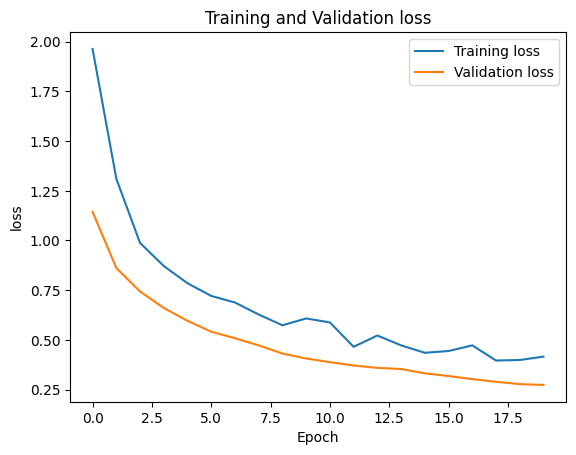

In [63]:
import matplotlib.pyplot as plt
plt.plot(history_new1.history['loss'], label='Training loss')
plt.plot(history_new1.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

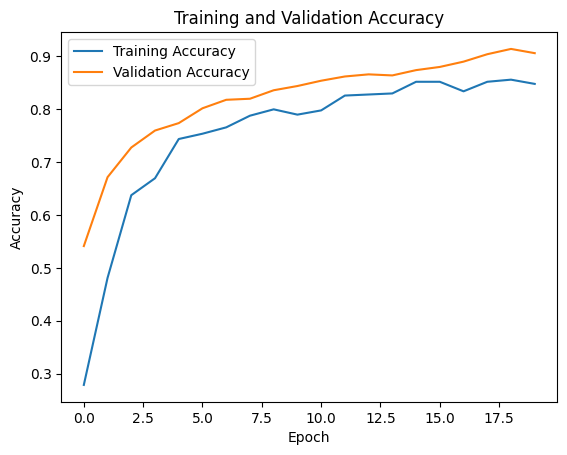

In [64]:
plt.plot(history_new1.history['accuracy'], label='Training Accuracy')
plt.plot(history_new1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction

1/1 [==============================] - 0s 79ms/step
Predicted class: combat


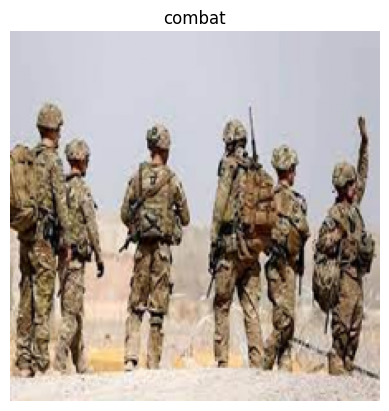

In [78]:
input_image = Image.open('/content/war_events/Combat/10.jpeg')
input_image = input_image.resize((224, 224))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

predictions = model_new1.predict(input_image)
class_labels = ['combat', 'destroyed_building', 'fire', 'humanterian', 'vehicles']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

plt.imshow(input_image[0])
plt.title(predicted_class_label)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 70ms/step
Predicted class: destroyed_building


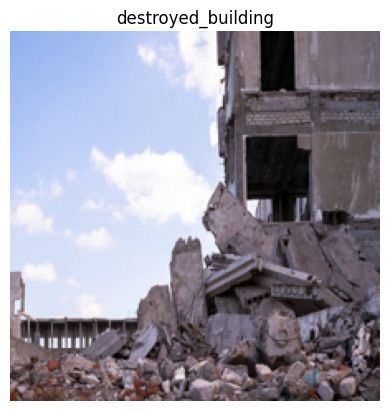

In [79]:
 input_image = Image.open('/content/war_events/DestroyedBuildings/A ruined large building with a pile of gray_.jpg')
input_image = input_image.resize((224, 224))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

predictions = model_new1.predict(input_image)
class_labels = ['combat', 'destroyed_building', 'fire', 'humanterian', 'vehicles']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

plt.imshow(input_image[0])
plt.title(predicted_class_label)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 123ms/step
Predicted class: fire


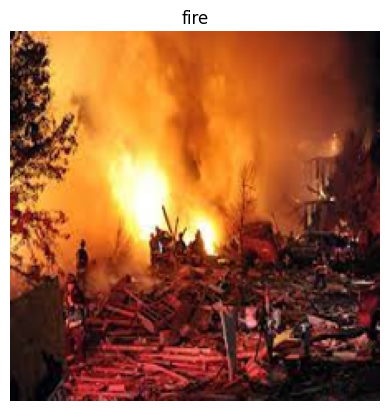

In [75]:
input_image = Image.open('/content/war_events/Fire/fire1.jpeg')
input_image = input_image.resize((224, 224))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

predictions = model_new1.predict(input_image)
class_labels = ['combat', 'destroyed_building', 'fire', 'humanterian', 'vehicles']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

plt.imshow(input_image[0])
plt.title(predicted_class_label)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 123ms/step
Predicted class: humanterian


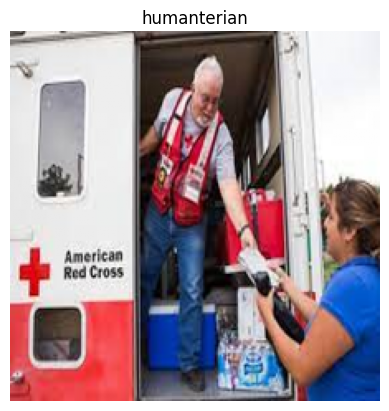

In [74]:
input_image = Image.open('/content/war_events/Humanitarian Aid and rehabilitation/61.jpeg')
input_image = input_image.resize((224, 224))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

predictions = model_new1.predict(input_image)
class_labels = ['combat', 'destroyed_building', 'fire', 'humanterian', 'vehicles']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

plt.imshow(input_image[0])
plt.title(predicted_class_label)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 61ms/step
Predicted class: vehicles


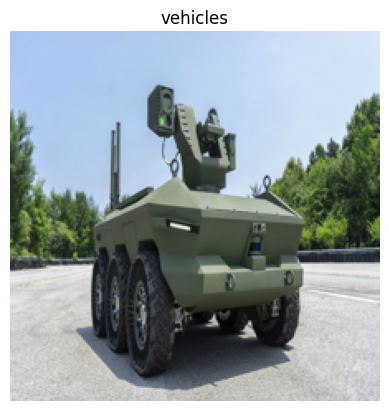

In [73]:
input_image = Image.open('/content/war_events/Military vehicles and weapons/12.jpg')
input_image = input_image.resize((224, 224))
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=0)

predictions = model_new1.predict(input_image)
class_labels = ['combat', 'destroyed_building', 'fire', 'humanterian', 'vehicles']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

plt.imshow(input_image[0])
plt.title(predicted_class_label)
plt.axis('off')
plt.show()
